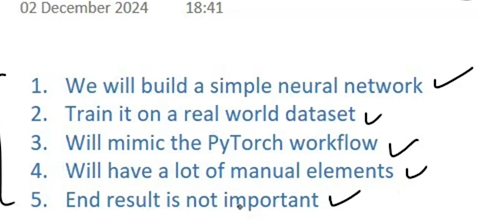

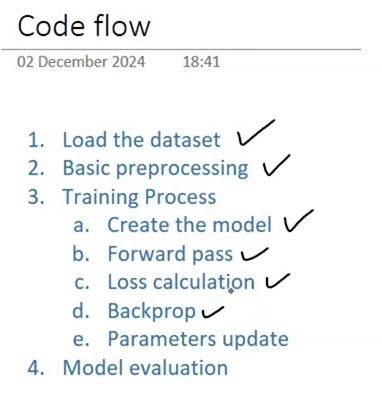


∇


# Importing Liabrires

In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data Loading

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data preprocessing

In [3]:
df.shape

(569, 33)

In [4]:
df.drop(columns = ['id','Unnamed: 32'],inplace = True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X=df.iloc[:, 1:] # Selects all columns from the second column onwards (all rows)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
y = df.iloc[:,0] # Selects the first column (all rows)
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


# Train test Split

In [8]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2)


#scaling


*   We fit on the training data only because we want to prevent data leakage and ensure that our model generalizes well to unseen data.

Key Reasons:

Avoiding Data Leakage:

If we fit on both X_train and X_test, the model will have access to information from the test set during training, leading to unrealistically high performance.
The test set should mimic real-world unseen data, so it must be transformed using parameters learned only from the training set.

Generalization:

Machine learning models are trained on X_train, so we compute the mean and standard deviation from X_train only.
Then, we apply the same transformation to X_test to ensure consistency and fairness when evaluating the model.

Consistency in Scaling:

If we compute the mean and standard deviation from the entire dataset (including X_test), the test data might influence the transformation of training data.
This would make the training process unrealistic because, in real-world scenarios, you wouldn’t have access to test data before making predictions.



In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Create an instance of StandardScaler

X_train = scaler.fit_transform(X_train)  # Fit to X_train and transform it
X_test = scaler.transform(X_test)  # Transform X_test using the same scaler


In [10]:
X_train

array([[ 1.94459855,  1.05304477,  1.94280613, ...,  1.5108369 ,
         0.40073674, -0.28017166],
       [-0.51657861, -0.29713312, -0.54645283, ..., -0.46118326,
         0.37933976, -0.1261324 ],
       [-0.49675325, -1.63049385, -0.52264003, ..., -0.27993987,
        -0.09139388, -0.86693607],
       ...,
       [-1.34272979,  0.66384758, -1.33720209, ..., -1.32854036,
        -0.73659523, -0.52837627],
       [ 0.16031591, -0.55900036,  0.10798867, ..., -0.52001056,
        -0.70367679, -0.96219003],
       [-0.06342747, -0.96020981, -0.10632655, ..., -0.18747503,
         0.11928411, -0.79018859]])

In [11]:
y_train

,diagnosis
250,M
155,B
170,B
562,M
177,M
...,...
36,M
546,B
553,B
486,B


## Label Encoding

In [12]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [13]:
y_train

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

## Numpy array to pytorch Tensor

In [14]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [15]:
X_train_tensor.shape

torch.Size([455, 30])

In [16]:
y_train_tensor.shape

torch.Size([455])

# Defining the Model

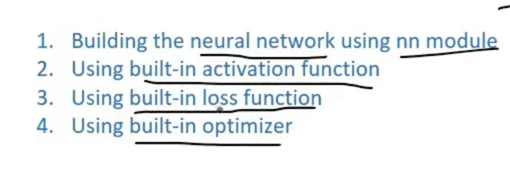

In [17]:
import torch.nn as nn
class MySimpleNN(nn.Module):
  def __init__(self,num_features):

    super().__init__()
    self.linear = nn.Linear(num_features,1)
    # self.weights = self.linear.weight
    self.sigmoid = nn.Sigmoid()


  def forward(self, features):
    out = self.linear(features)
    out = self.sigmoid(out)

    return out








# Important Parameters

In [18]:
learning_rate = 0.1
epochs = 25


In [19]:
# Define loss function
loss_function = nn.BCELoss()

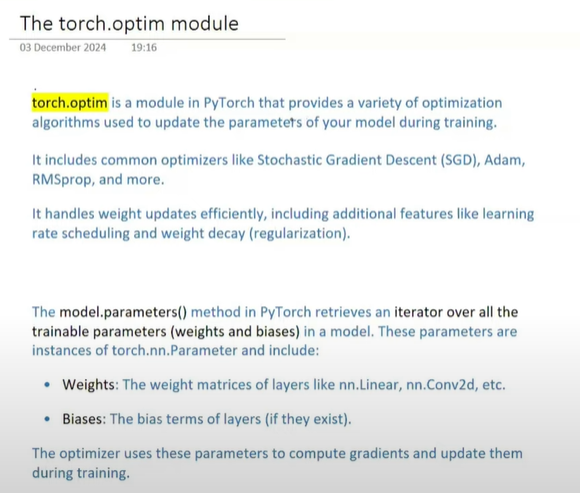

# Training Pipeline

In [20]:
# Create Model
model  = MySimpleNN(X_train_tensor.shape[1])

# Define optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# Define Loop
for epoch in range(epochs):
  # Forward Pass
  y_pred = model(X_train_tensor.type(torch.float32))

  # loss calculate
  loss  = loss_function(y_pred, y_train_tensor.view(-1,1).type(torch.float32)) # view works as reshaping into same typess


   # clear gradients
  optimizer.zero_grad()
  # Backward Pass
  loss.backward()

 # parametters update
  optimizer.step()
  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')






Epoch: 1, Loss: 0.7139255404472351
Epoch: 2, Loss: 0.5377093553543091
Epoch: 3, Loss: 0.44683119654655457
Epoch: 4, Loss: 0.3913104236125946
Epoch: 5, Loss: 0.3531804084777832
Epoch: 6, Loss: 0.3249706029891968
Epoch: 7, Loss: 0.30301952362060547
Epoch: 8, Loss: 0.2853087782859802
Epoch: 9, Loss: 0.2706257104873657
Epoch: 10, Loss: 0.25819358229637146
Epoch: 11, Loss: 0.24748890101909637
Epoch: 12, Loss: 0.23814448714256287
Epoch: 13, Loss: 0.22989410161972046
Epoch: 14, Loss: 0.22253938019275665
Epoch: 15, Loss: 0.21592901647090912
Epoch: 16, Loss: 0.2099454253911972
Epoch: 17, Loss: 0.20449550449848175
Epoch: 18, Loss: 0.19950447976589203
Epoch: 19, Loss: 0.19491150975227356
Epoch: 20, Loss: 0.1906665563583374
Epoch: 21, Loss: 0.18672794103622437
Epoch: 22, Loss: 0.1830606609582901
Epoch: 23, Loss: 0.17963513731956482
Epoch: 24, Loss: 0.17642608284950256
Epoch: 25, Loss: 0.1734118014574051


# Evaluation

In [21]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor.type(torch.float32))
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.5024622678756714
